In [1]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import json
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import GOSTnets as gn

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Grafo Lima

In [324]:
%%time
# place_name = "Lima, Peru"
place_name = ["Province of Lima, Lima Metropolitan Area, Lima, Peru",
"Constitutional Province of Callao, Peru"]
graph = ox.graph_from_place(place_name, which_result=1, network_type='drive')

CPU times: user 2min 32s, sys: 5.67 s, total: 2min 37s
Wall time: 9min 2s


In [325]:
print(nx.info(graph))

Name: 
Type: MultiDiGraph
Number of nodes: 140204
Number of edges: 379702
Average in degree:   2.7082
Average out degree:   2.7082


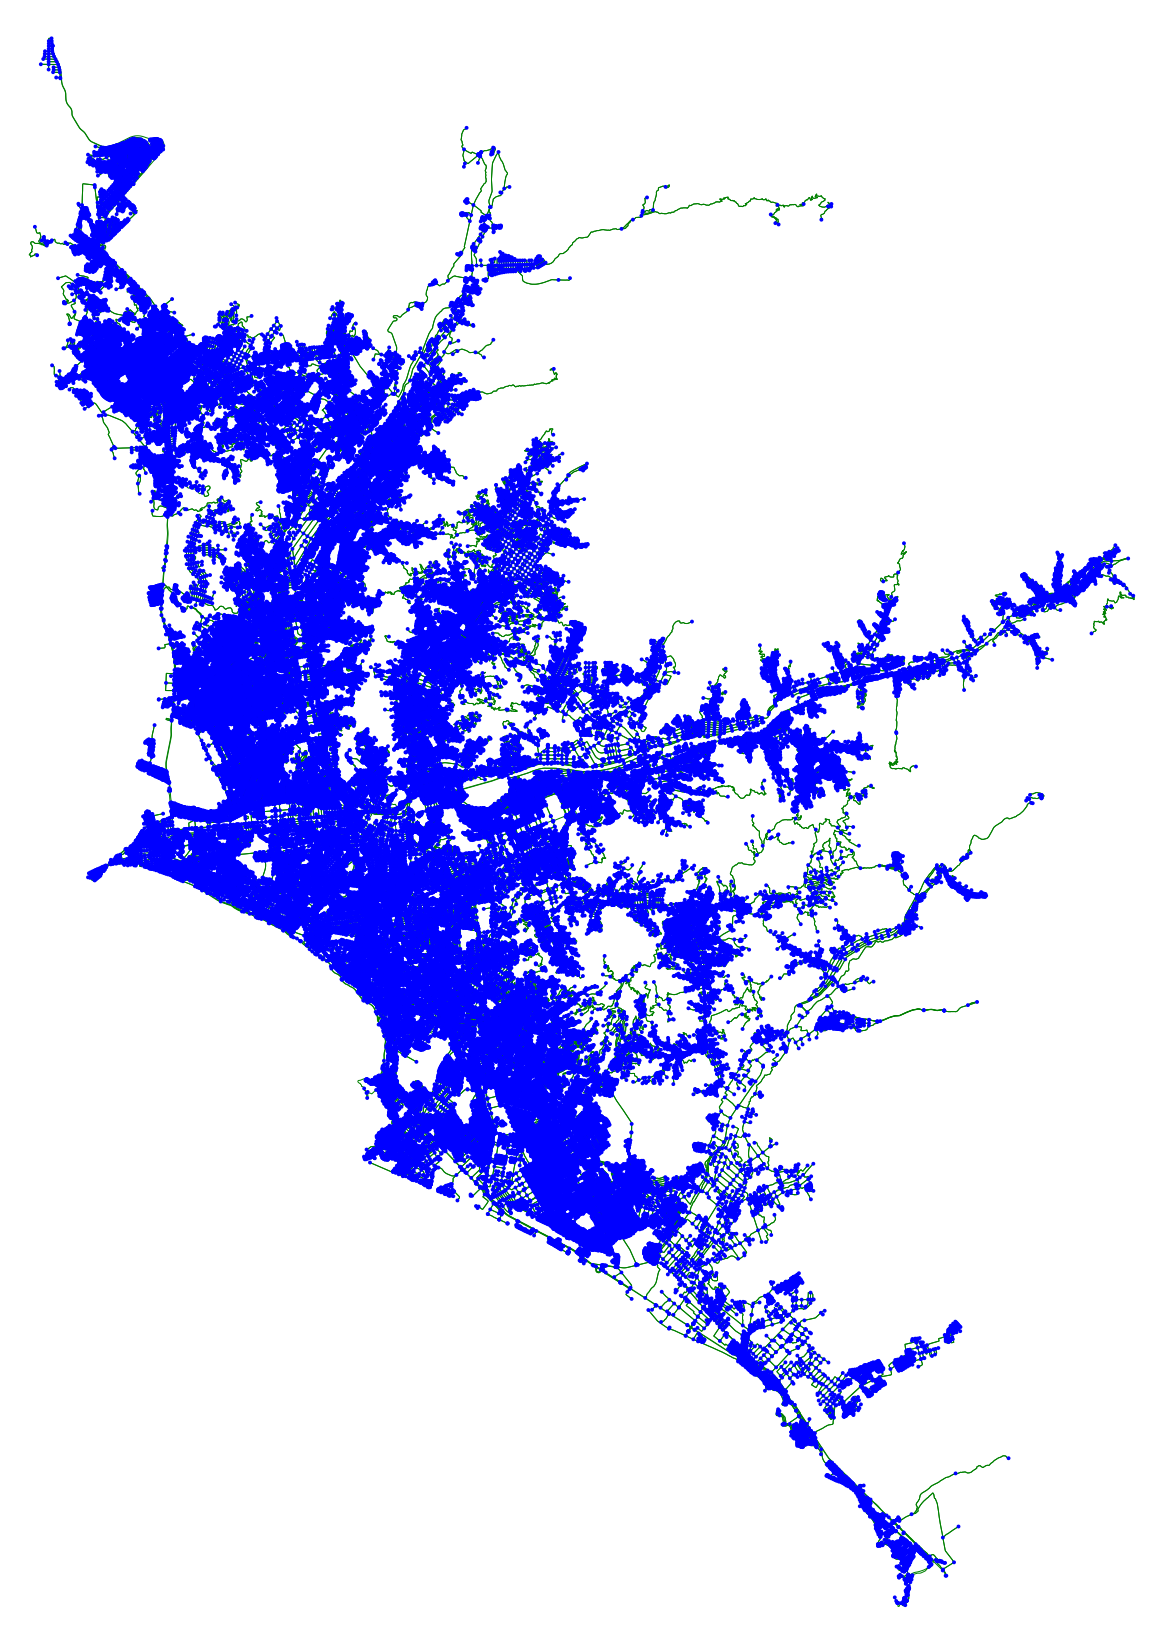

In [326]:
fig, ax = ox.plot_graph(graph, bgcolor='white', node_color='blue', edge_color='green', figsize=(30,30))

In [327]:
nodes, edges = ox.graph_to_gdfs(graph)

In [351]:
nodes.head()

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
258066779,-12.371160,-76.784901,45A,motorway_junction,3,POINT (-76.78490 -12.37116)
258066780,-12.376522,-76.779354,NaN,NaN,3,POINT (-76.77935 -12.37652)
258066781,-12.384553,-76.771046,NaN,NaN,3,POINT (-76.77105 -12.38455)
258066783,-12.385783,-76.769768,NaN,NaN,3,POINT (-76.76977 -12.38578)
258067237,-12.304254,-76.840727,NaN,NaN,3,POINT (-76.84073 -12.30425)


In [329]:
edges.head()

osmid  oneway lanes  \
u         v          key                                                     
258066779 472563248  0                              39457621    True     1   
          258066780  0    [1046533254, 338193454, 143630423]    True     2   
258066780 9158114888 0                             143630430    True     2   
258066781 258066783  0                             143630430    True     2   
          495302399  0                              40752940    True     1   

                                highway maxspeed   length  \
u         v          key                                    
258066779 472563248  0    motorway_link       80  442.899   
          258066780  0         motorway      100  847.636   
258066780 9158114888 0            trunk      100  406.278   
258066781 258066783  0            trunk      100  194.871   
          495302399  0       trunk_link      NaN   85.154   

                                                                   geometry  \
u         v          key                                                      
258066779 472563248  0    LINESTRING (-76.78490 -12.37116, -76.78457 -12...   
          258066780  0    LINESTRING (-76.78490 -12.37116, -76.78433 -12...   
258066780 9158114888 0    LINESTRING (-76.77935 -12.37652, -76.77670 -12...   
258066781 258066783  0    LINESTRING (-76.77105 -12.38455, -76.76977 -12...   
          495302399  0    LINESTRING (-76.77105 -12.38455, -76.77099 -12...   

                            ref                        name bridge junction  \
u         v          key                                                      
258066779 472563248  0      NaN                         NaN    NaN      NaN   
          258066780  0    PE-1S  Carretera Panamericana Sur    yes      NaN   
258066780 9158114888 0    PE-1S  Carretera Panamericana Sur    NaN      NaN   
258066781 258066783  0    PE-1S  Carretera Panamericana Sur    NaN      NaN   
          495302399  0      NaN                         NaN    NaN      NaN   

                         tunnel access width service  
u         v          key                              
258066779 472563248  0      NaN    NaN   NaN     NaN  
          258066780  0      NaN    NaN   NaN     NaN  
258066780 9158114888 0      NaN    NaN   NaN     NaN  
258066781 258066783  0      NaN    NaN   NaN     NaN  
          495302399  0      NaN    NaN   NaN     NaN

# Rutas transporte

In [22]:
df = pd.read_csv("rutas/Rutas_COSAC_I.csv")
df['geometry'] = df['geometry'].apply(wkt.loads)
rutascosac = gpd.GeoDataFrame(df, crs='epsg:4326')

In [185]:
rutascosac

,name,geometry,geometry_layer,geometry_proj4
0,AC01_1,"LINESTRING Z (-77.03617 -12.05802 0.00000, -77...",Alim_COSAC,+proj=longlat +datum=WGS84 +no_defs
1,AC01_2,"LINESTRING Z (-77.01276 -12.06242 0.00000, -77...",Alim_COSAC,+proj=longlat +datum=WGS84 +no_defs
2,AN01_1,"LINESTRING Z (-77.05891 -11.98019 0.00000, -77...",Alim_COSAC,+proj=longlat +datum=WGS84 +no_defs
3,AN01_2,"LINESTRING Z (-77.03804 -11.97890 0.00000, -77...",Alim_COSAC,+proj=longlat +datum=WGS84 +no_defs
4,AN02_1,"LINESTRING Z (-77.05891 -11.98019 0.00000, -77...",Alim_COSAC,+proj=longlat +datum=WGS84 +no_defs
...,...,...,...,...
849,LOS JAZMINES (Emb.N°2),POINT Z (-77.05479 -12.00197 0.00000),Troncal (#2),+proj=longlat +datum=WGS84 +no_defs
850,INDEPENDENCIA (Emb.N°2),POINT Z (-77.05525 -11.99833 0.00000),Troncal (#2),+proj=longlat +datum=WGS84 +no_defs
851,PACIFICO (Emb.N°2),POINT Z (-77.05618 -11.99460 0.00000),Troncal (#2),+proj=longlat +datum=WGS84 +no_defs
852,IZAGUIRRE (Emb.N°2),POINT Z (-77.05701 -11.98946 0.00000),Troncal (#2),+proj=longlat +datum=WGS84 +no_defs


<AxesSubplot:>

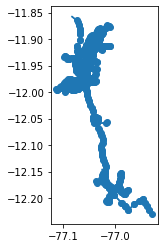

In [131]:
rutascosac.plot()

In [26]:
df = pd.read_csv("rutas/Rutas_Corredores_Complementarios.csv")
df['geometry'] = df['geometry'].apply(wkt.loads)
rutascorredores = gpd.GeoDataFrame(df, crs='epsg:4326')

In [186]:
rutascorredores

,name,geometry,geometry_layer,geometry_proj4
0,VUELTA,"LINESTRING Z (-77.08706 -11.97458 0.00000, -77...",Rutas,+proj=longlat +datum=WGS84 +no_defs
1,IDA,"LINESTRING Z (-77.08699 -11.97281 0.00000, -77...",Rutas,+proj=longlat +datum=WGS84 +no_defs
2,Layover Norte - Sur,"LINESTRING Z (-77.08720 -11.97442 0.00000, -77...",Rutas,+proj=longlat +datum=WGS84 +no_defs
3,Layover Sur - Norte,"LINESTRING Z (-76.92961 -12.22993 0.00000, -76...",Rutas,+proj=longlat +datum=WGS84 +no_defs
4,Proceres,POINT Z (-76.98355 -12.15259 0.00000),Vuelta,+proj=longlat +datum=WGS84 +no_defs
...,...,...,...,...
1160,Puruchuco,POINT Z (-76.93523 -12.04235 -152.95955),Paraderos (#17),+proj=longlat +datum=WGS84 +no_defs
1161,Pista Nueva,POINT Z (-76.93227 -12.03887 -152.95955),Paraderos (#17),+proj=longlat +datum=WGS84 +no_defs
1162,Soldadura,POINT Z (-76.93099 -12.03742 -152.95955),Paraderos (#17),+proj=longlat +datum=WGS84 +no_defs
1163,Los Angeles,POINT Z (-76.92888 -12.03485 -152.95955),Paraderos (#17),+proj=longlat +datum=WGS84 +no_defs


<AxesSubplot:>

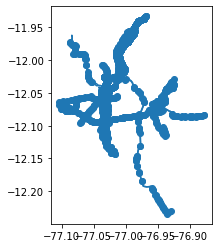

In [133]:
rutascorredores.plot()

In [51]:
df = pd.read_csv("rutas/Rutas_Transporte_Publico_Lima.csv")
df['geometry'] = df['geometry'].apply(wkt.loads)
rutastransportepublico = gpd.GeoDataFrame(df, crs='epsg:4326')

In [166]:
rutastransportepublico['ruta'] = rutastransportepublico['name'].apply(lambda x: str(x).split('_')[0])

In [201]:
rutastransportepublico2 = rutastransportepublico.dissolve(by='ruta').reset_index() #.plot(figsize = (35,35))
# rutastransportepublico.head()

In [330]:
rutastransportepublico2

,ruta,geometry,name,geometry_layer,geometry_proj4
0,1101,MULTILINESTRING Z ((-77.02704 -11.87652 0.0000...,1101_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
1,1102,MULTILINESTRING Z ((-77.04456 -11.82879 0.0000...,1102_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
2,1103,MULTILINESTRING Z ((-77.00432 -11.85810 0.0000...,1103_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
3,1104,MULTILINESTRING Z ((-77.09005 -11.91961 0.0000...,1104_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
4,1105,MULTILINESTRING Z ((-77.05594 -11.86216 0.0000...,1105_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
...,...,...,...,...,...
505,UCL-11,MULTILINESTRING Z ((-77.09643 -11.88544 0.0000...,UCL-11_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
506,UCL-12,MULTILINESTRING Z ((-77.11289 -12.07636 0.0000...,UCL-12_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
507,UCL-13,MULTILINESTRING Z ((-77.16800 -11.83161 0.0000...,UCL-13_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs
508,UCL-14,MULTILINESTRING Z ((-77.14281 -12.06212 0.0000...,UCL-14_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs


<AxesSubplot:>

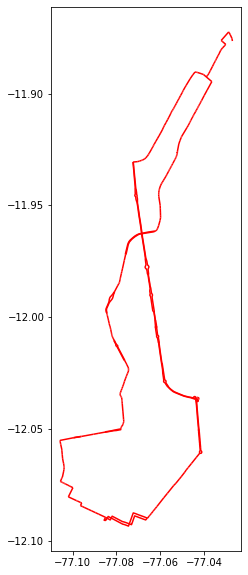

In [203]:
# cond = rutastransportepublico['ruta'].isin(['1101_Ida', '1101_Vuelta'])
cond = rutastransportepublico2['ruta'].isin(['1101'])
tmp = rutastransportepublico2[cond]
tmp.plot(color='red', figsize=(10,10))

# Points - Rutas Transporte Publico

In [331]:
%%time
rutastransportepublico2_points = gpd.overlay(edges, rutastransportepublico2, keep_geom_type=False)

CPU times: user 10h 10min 7s, sys: 24.1 s, total: 10h 10min 32s
Wall time: 10h 10min 32s


In [332]:
rutastransportepublico2_points

,osmid,oneway,lanes,highway,maxspeed,length,ref,name_1,bridge,junction,tunnel,access,width,service,ruta,name_2,geometry_layer,geometry_proj4,geometry
0,"[1046533254, 338193454, 143630423]",True,2,motorway,100,847.636,PE-1S,Carretera Panamericana Sur,yes,NaN,NaN,NaN,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.78170 -12.37424 0.00000)
1,111929278,False,2,residential,NaN,9.345,NaN,Jirón Las Gardenias,NaN,NaN,NaN,NaN,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84721 -12.29979 0.00000)
2,340019497,True,3,motorway,80,848.545,PE-1S,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84496 -12.30176 0.00000)
3,435386375,True,2,motorway,80,958.197,PE-1S,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84502 -12.30188 0.00000)
4,39457637,True,1,trunk_link,80,15.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.78189 -12.37441 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257760,849534174,False,2,secondary,60,93.358,LM-691,Avenida Huarangal,NaN,NaN,NaN,NaN,NaN,NaN,1198,1198_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-77.01975 -11.83110 0.00000)
257761,1020024094,False,NaN,residential,NaN,142.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1198,1198_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-77.01987 -11.83176 0.00000)
257762,883336775,False,NaN,residential,NaN,170.546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1198,1198_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-77.02751 -11.84717 0.00000)
257763,327850466,False,NaN,unclassified,NaN,160.021,NaN,Avenida Huarangal,NaN,NaN,NaN,NaN,NaN,NaN,1198,1198_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-77.02581 -11.84574 0.00000)


<AxesSubplot:>

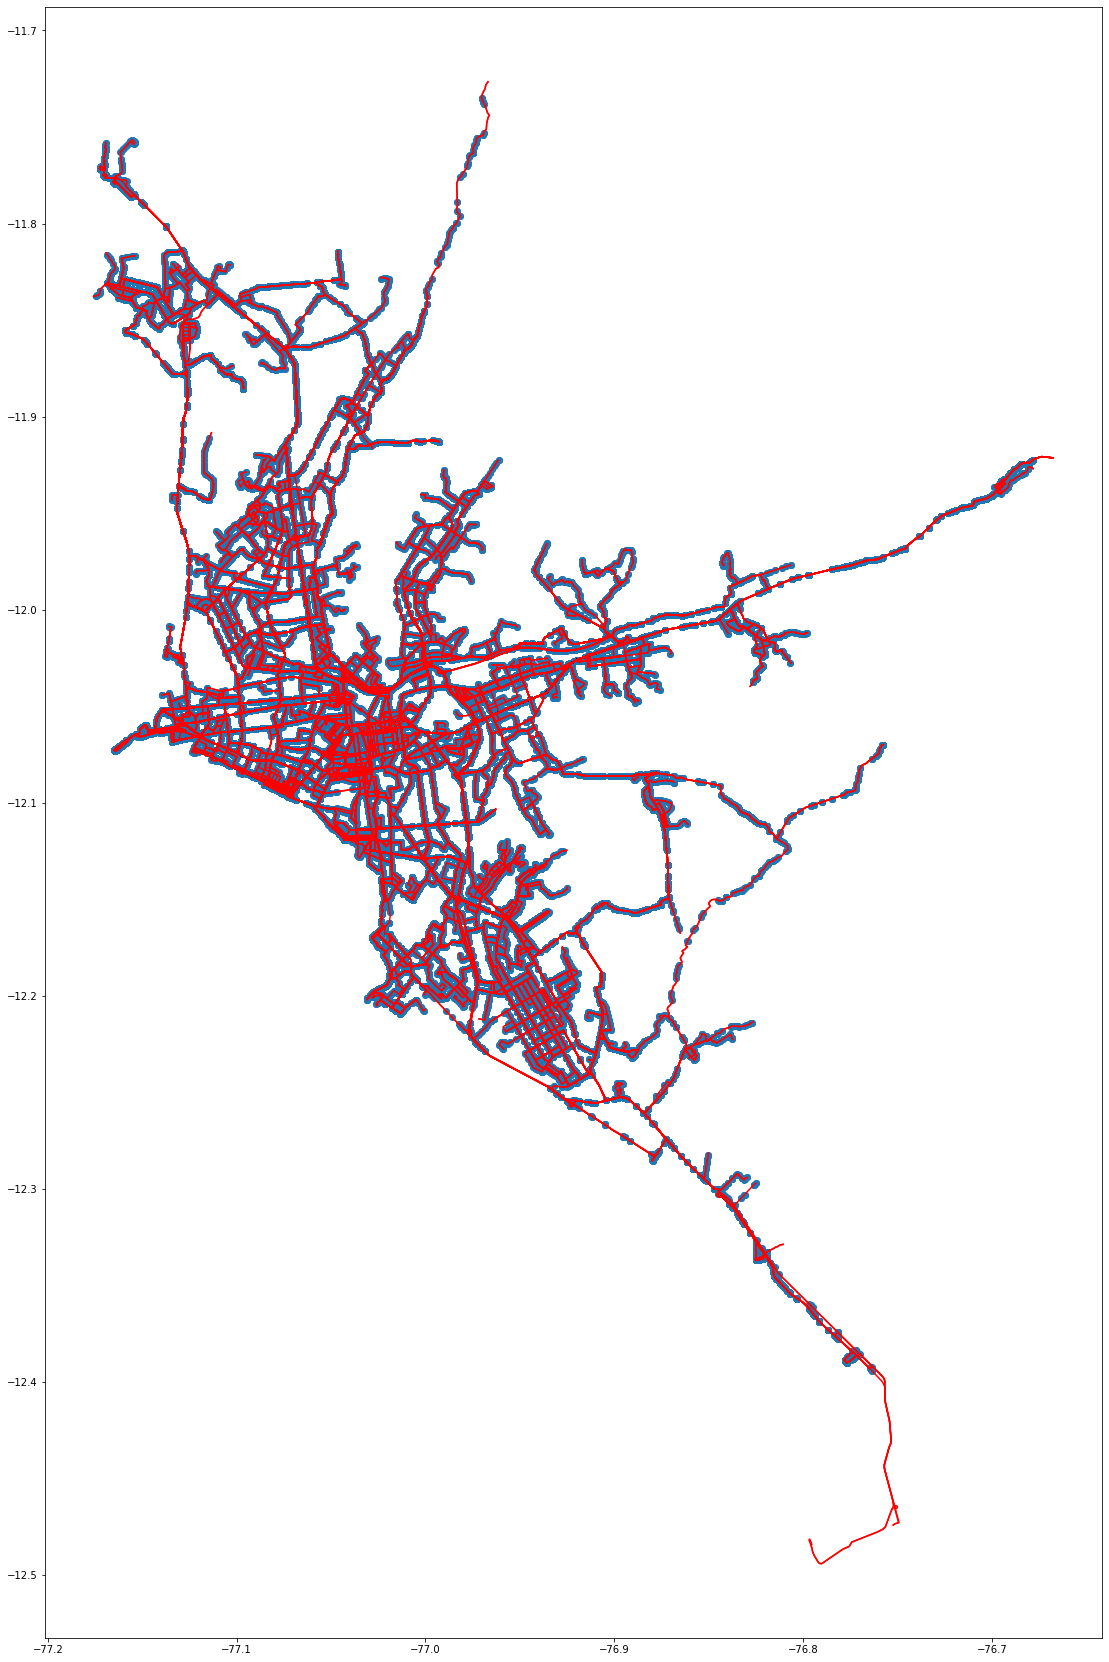

In [333]:
fig, ax = plt.subplots(figsize = (30,30))
# cond = rutastransportepublico2_points['ruta'].isin(['1198'])
rutastransportepublico2_points.plot( ax=ax)

# cond = rutastransportepublico['ruta'].isin(['1198'])
rutastransportepublico.plot(ax=ax, color='r')

In [336]:
from shapely.geometry import Point

transporte_nodes = rutastransportepublico2_points.explode()
transporte_nodes['isPoint'] = transporte_nodes.apply(lambda x: type(x.geometry) is Point , axis=1)
# res2['isPoint'].unique()
transporte_nodes

,,osmid,oneway,lanes,highway,maxspeed,length,ref,name_1,bridge,junction,tunnel,access,width,service,ruta,name_2,geometry_layer,geometry_proj4,geometry,isPoint
0,0,"[1046533254, 338193454, 143630423]",True,2,motorway,100,847.636,PE-1S,Carretera Panamericana Sur,yes,NaN,NaN,NaN,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.78170 -12.37424 0.00000),True
1,0,111929278,False,2,residential,NaN,9.345,NaN,Jirón Las Gardenias,NaN,NaN,NaN,NaN,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84721 -12.29979 0.00000),True
2,0,340019497,True,3,motorway,80,848.545,PE-1S,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84496 -12.30176 0.00000),True
3,0,435386375,True,2,motorway,80,958.197,PE-1S,Carretera Panamericana Sur,NaN,NaN,NaN,NaN,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84502 -12.30188 0.00000),True
4,0,39457637,True,1,trunk_link,80,15.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.78189 -12.37441 0.00000),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257760,0,849534174,False,2,secondary,60,93.358,LM-691,Avenida Huarangal,NaN,NaN,NaN,NaN,NaN,NaN,1198,1198_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-77.01975 -11.83110 0.00000),True
257761,0,1020024094,False,NaN,residential,NaN,142.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1198,1198_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-77.01987 -11.83176 0.00000),True
257762,0,883336775,False,NaN,residential,NaN,170.546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1198,1198_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-77.02751 -11.84717 0.00000),True
257763,0,327850466,False,NaN,unclassified,NaN,160.021,NaN,Avenida Huarangal,NaN,NaN,NaN,NaN,NaN,NaN,1198,1198_Vuelta,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-77.02581 -11.84574 0.00000),True


In [337]:
%%time
transporte_nodes.to_csv("rutas/Rutas_Transporte_Publico_Points_Lima.csv")

CPU times: user 18.4 s, sys: 132 ms, total: 18.5 s
Wall time: 18.5 s


In [ ]:
#Transporte nodes snap grafo lima y callao

<AxesSubplot:>

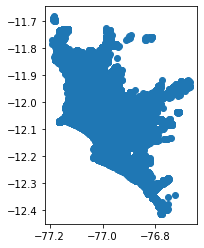

In [363]:
nodes.plot()

<AxesSubplot:>

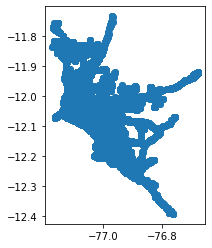

In [362]:
transporte_nodes.plot()

In [ ]:
%%time
rutas_nodes = gn.pandana_snap_points( transporte_nodes , nodes )
rutas_nodes
# PID 38568

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initializatio

In [393]:
rutas_nodes.rename(columns={'NN': 'lima_node', 'NN_dist':'lima_node_dist'}, inplace=True)
rutas_nodes.head()

,,osmid,oneway,lanes,highway,maxspeed,length,ref,name_1,bridge,junction,...,width,service,ruta,name_2,geometry_layer,geometry_proj4,geometry,isPoint,lima_node,lima_node_dist
0,0,"[1046533254, 338193454, 143630423]",True,2,motorway,100,847.636,PE-1S,Carretera Panamericana Sur,yes,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.78170 -12.37424 0.00000),True,472561534,0.000261
1,0,111929278,False,2,residential,NaN,9.345,NaN,Jirón Las Gardenias,NaN,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84721 -12.29979 0.00000),True,4337669195,0.000041
2,0,340019497,True,3,motorway,80,848.545,PE-1S,Carretera Panamericana Sur,NaN,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84496 -12.30176 0.00000),True,3007012217,0.000452
3,0,435386375,True,2,motorway,80,958.197,PE-1S,Carretera Panamericana Sur,NaN,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84502 -12.30188 0.00000),True,289310449,0.000407
4,0,39457637,True,1,trunk_link,80,15.187,NaN,NaN,NaN,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.78189 -12.37441 0.00000),True,472561534,0.000061


In [394]:
rutas_nodes.to_csv("rutas/RutasLima_snap_LimaNodes.csv", sep=";")

In [491]:
cond = limaMapa['LimaCallao']
limaMapa[cond]

,iddpto,departamen,idprov,provincia,iddist,distrito,capital,codccpp,area,fuente,geometry,LimaCallao
689,07,CALLAO,0701,CALLAO,070105,LA PUNTA,LA PUNTA,0001,1,INEI,"POLYGON ((-77.15884 -12.06645, -77.15874 -12.0...",True
690,07,CALLAO,0701,CALLAO,070104,LA PERLA,LA PERLA,0001,1,INEI,"POLYGON ((-77.10444 -12.07020, -77.10486 -12.0...",True
691,07,CALLAO,0701,CALLAO,070102,BELLAVISTA,BELLAVISTA,0001,1,INEI,"POLYGON ((-77.10086 -12.06307, -77.10317 -12.0...",True
692,07,CALLAO,0701,CALLAO,070103,CARMEN DE LA LEGUA REYNOSO,CARMEN DE LA LEGUA REYNOSO,0001,1,INEI,"POLYGON ((-77.08317 -12.03925, -77.08263 -12.0...",True
693,07,CALLAO,0701,CALLAO,070101,CALLAO,CALLAO,0001,1,INEI,"POLYGON ((-77.11219 -11.97352, -77.11203 -11.9...",True
694,07,CALLAO,0701,CALLAO,070106,VENTANILLA,VENTANILLA,0001,1,INEI,"POLYGON ((-77.13521 -11.81782, -77.13516 -11.8...",True
695,07,CALLAO,0701,CALLAO,070107,MI PERU,MI PERU,0001,1,INEI,"POLYGON ((-77.11509 -11.84172, -77.11450 -11.8...",True
1285,15,LIMA,1501,LIMA,150119,LURIN,LURIN,0001,1,INEI,"POLYGON ((-76.70549 -12.17672, -76.70429 -12.1...",True
1293,15,LIMA,1501,LIMA,150102,ANCON,ANCON,0001,1,INEI,"POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...",True
1308,15,LIMA,1501,LIMA,150131,SAN ISIDRO,SAN ISIDRO,0001,1,INEI,"POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...",True


In [492]:
limaMapa[cond].to_csv("rutas/MapaLimaCallao.csv", index=False)

In [418]:
type(rutas_nodes)

geopandas.geodataframe.GeoDataFrame

# Subgraph de rutas

In [460]:
%%time
H = graph.subgraph(list(rutas_nodes['lima_node'].unique())).copy()

CPU times: user 647 ms, sys: 99.9 ms, total: 747 ms
Wall time: 746 ms


In [450]:
print(nx.info(H))

Name: 
Type: MultiDiGraph
Number of nodes: 15877
Number of edges: 17930
Average in degree:   1.1293
Average out degree:   1.1293


In [463]:
H_isolates = list(nx.isolates(H))
H_isolates

[5497389063,
 1746075730,
 391020640,
 391020643,
 1746075800,
 8211366064,
 1814003909,
 263389383,
 4202201289,
 1273921759,
 638353637,
 3737747721,
 817299722,
 3738206528,
 4767940994,
 822493976,
 6277628313,
 4207804827,
 4334125520,
 9307357723,
 6975390284,
 611484241,
 1844839020,
 1814004355,
 1701741214,
 629047969,
 1701741222,
 1399063215,
 1814004409,
 1273496300,
 1938228015,
 427590465,
 1256325976,
 6283854697,
 660669296,
 1396409212,
 1781236655,
 4297360318,
 3153724398,
 1410761754,
 2840658987,
 2840658993,
 1753089104,
 848397400,
 1753089120,
 848397410,
 821789798,
 848397416,
 5489263728,
 1756333202,
 1756333223,
 316802232,
 1711899842,
 1711899855,
 3958441183,
 1743684836,
 821593349,
 4351788307,
 9518562875,
 2383676704,
 1273627971,
 1273529670,
 289310028,
 1710982572,
 4358112700,
 4351788478,
 4341761477,
 3974039004,
 1711015429,
 1319962128,
 1710982676,
 1711015449,
 263357992,
 3718874765,
 1273726618,
 3496249029,
 1385727717,
 1385727753,
 127

In [464]:
print("Number of nodes: %s" % H.number_of_nodes())
print("Number of isolates %s" % nx.number_of_isolates(H))

print("Ratio of isolates %.3f" % (nx.number_of_isolates(H) / H.number_of_nodes()) )

Number of nodes: 15877
Number of isolates 1670
Ratio of isolates 0.105


In [465]:
H.remove_nodes_from(H_isolates)

In [466]:
print(nx.info(H))
nx.number_of_isolates(H)

Name: 
Type: MultiDiGraph
Number of nodes: 14207
Number of edges: 17930
Average in degree:   1.2621
Average out degree:   1.2621


0

In [490]:
%%time
# save graph to disk
ox.save_graphml(H, 'rutas/GrafoTransporte.graphml')

# # load graph from disk and confirm 'w3' edge attribute is there
# G2 = ox.load_graphml('./data/graph.graphml')
# nx.get_edge_attributes(G2, 'w3')

CPU times: user 1.84 s, sys: 56 ms, total: 1.9 s
Wall time: 1.91 s


In [2]:
# load graph from disk and confirm 'w3' edge attribute is there
H = ox.load_graphml('rutas/GrafoTransporte.graphml')
# nx.get_edge_attributes(H, 'w3')
print(nx.info(H))

Name: 
Type: MultiDiGraph
Number of nodes: 14207
Number of edges: 17930
Average in degree:   1.2621
Average out degree:   1.2621


In [469]:
h_nodes, h_edges = ox.graph_to_gdfs(H)

In [487]:
%%time
h_nodes.to_csv("rutas/GrafoTransporte_nodes.csv")
h_edges.to_csv("rutas/GrafoTransporte_edges.csv")

CPU times: user 1.08 s, sys: 12 ms, total: 1.09 s
Wall time: 1.09 s


In [489]:
rutas_nodes.head()

,,osmid,oneway,lanes,highway,maxspeed,length,ref,name_1,bridge,junction,...,width,service,ruta,name_2,geometry_layer,geometry_proj4,geometry,isPoint,lima_node,lima_node_dist
0,0,"[1046533254, 338193454, 143630423]",True,2,motorway,100,847.636,PE-1S,Carretera Panamericana Sur,yes,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.78170 -12.37424 0.00000),True,472561534,0.000261
1,0,111929278,False,2,residential,NaN,9.345,NaN,Jirón Las Gardenias,NaN,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84721 -12.29979 0.00000),True,4337669195,0.000041
2,0,340019497,True,3,motorway,80,848.545,PE-1S,Carretera Panamericana Sur,NaN,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84496 -12.30176 0.00000),True,3007012217,0.000452
3,0,435386375,True,2,motorway,80,958.197,PE-1S,Carretera Panamericana Sur,NaN,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84502 -12.30188 0.00000),True,289310449,0.000407
4,0,39457637,True,1,trunk_link,80,15.187,NaN,NaN,NaN,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.78189 -12.37441 0.00000),True,472561534,0.000061


<AxesSubplot:>

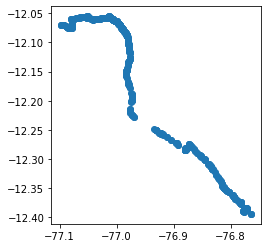

In [484]:
rutas = ['8511']
rutas_nodes.query('ruta in @rutas').plot()

In [481]:
# h_edges.plot()
cond = rutas_nodes['ruta'].isin(['8511'])
type(rutas_nodes[cond])

pandas.core.frame.DataFrame

<AxesSubplot:>

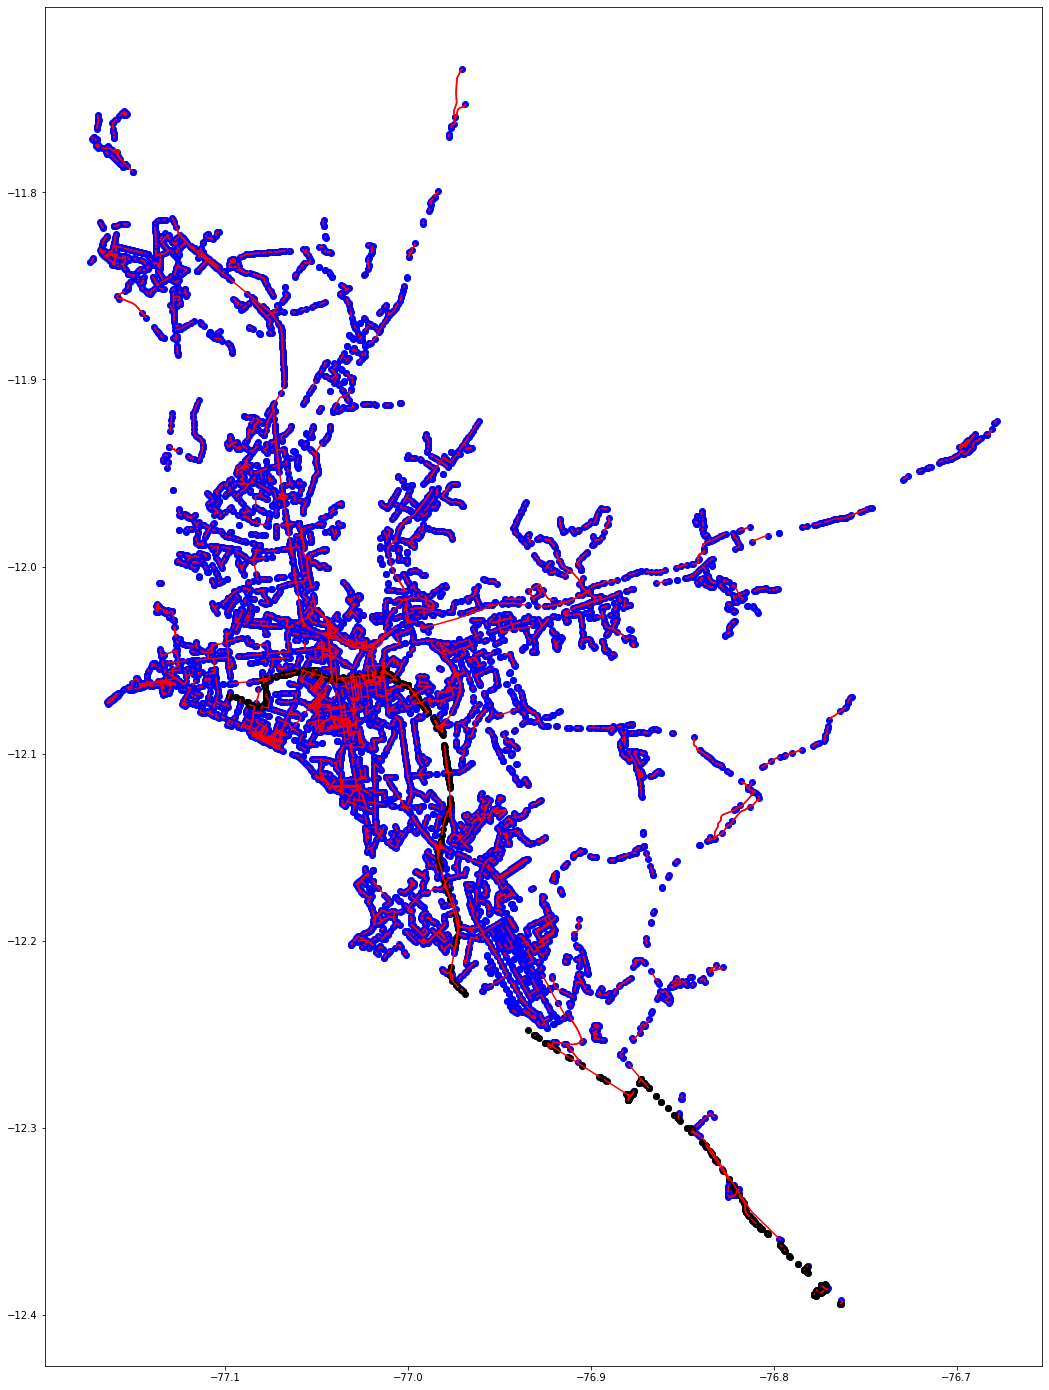

In [486]:
fig, ax = plt.subplots( figsize=(25,25) )
# tmp.plot(ax=ax, color='red')
# nodes.loc[[4337669195]].plot(ax=ax, color='green', marker='x')
# nodes.loc[H_isolates].plot(ax=ax, color='cyan', marker='^')
h_nodes.plot(ax=ax, color='blue')
h_edges.plot(ax=ax, color='red')

rutas = ['8511']
rutas_nodes.query('ruta in @rutas').plot(ax=ax, color='black')

# ox.plot_graph(H, bgcolor='white', node_color='blue', edge_color='red', ax=ax)


In [376]:
print(nx.info(H))

Name: 
Type: MultiDiGraph
Number of nodes: 15877
Number of edges: 17930
Average in degree:   1.1293
Average out degree:   1.1293


In [338]:
df = pd.read_csv("rutas/Rutas_Transporte_Publico_Points_Lima.csv", index_col=[0,1])
df['geometry'] = df['geometry'].apply(wkt.loads)
res3 = gpd.GeoDataFrame(df, crs='epsg:4326')

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,11,12,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [341]:
res3.shape

(295487, 20)

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
# cond = rutastransportepublico2_points['ruta'].isin(['1198'])
transporte_nodes.plot( ax=ax)

# cond = rutastransportepublico['ruta'].isin(['1198'])
rutastransportepublico.plot(ax=ax, color='r')

<AxesSubplot:>

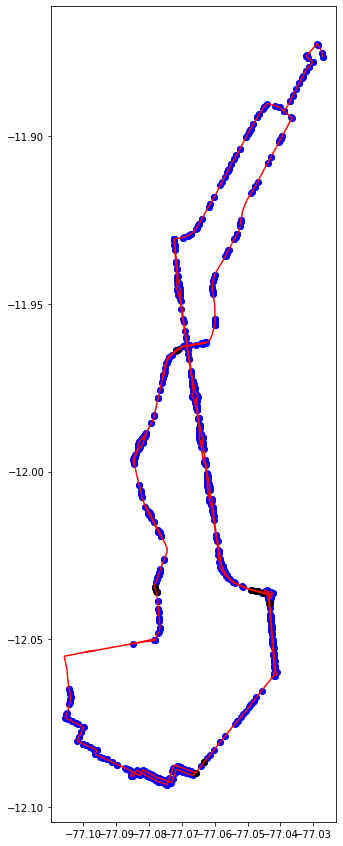

In [299]:
fig, ax = plt.subplots(figsize=(15,15))
edges[edges['osmid'] == 279007828].plot(ax=ax, color='black')
tmp.plot(ax=ax, color='r')
res.plot(ax=ax, color='b')
res.astype({'osmid':str}).sort_values('osmid').tail(10).plot(ax=ax, color='black')
rutastransportepublico2_points
# plt.show()

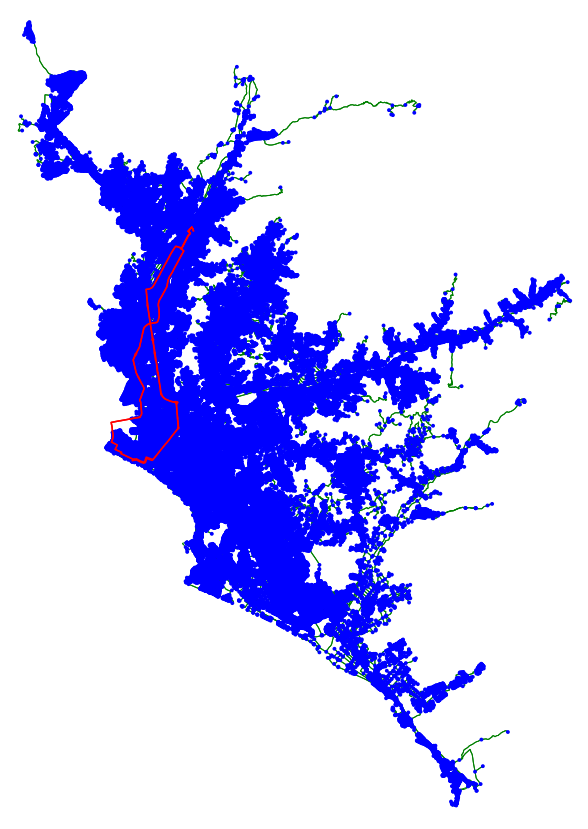

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

In [143]:
fig, ax = plt.subplots(figsize=(15,15))
tmp.plot(ax=ax, color='red')
ox.plot_graph(graph, bgcolor='white', node_color='blue', edge_color='green', ax=ax)

# Amenities

In [37]:
%%time
amenitiesLima = pd.read_csv('LimaOSM/LimaAmenities.csv')
amenitiesLima['geometry'] = amenitiesLima['geometry'].apply(wkt.loads)
amenitiesLima = gpd.GeoDataFrame(amenitiesLima, crs='epsg:4326')
amenitiesLima.head()

<string>:2: DtypeWarning: Columns (5,6,7,11,12,13,14,16,17,18,19,20,21,23,24,25,26,27,29,30,31,34,43,44,45,46,47,48,49,50,51,52,53,54,55,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,103,104,105,106,107,108,109,110,111,112,114,115,116,117,118,119,120,121,122,123,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,287,288,289,290,291,292,293,295,296,2

CPU times: user 1.71 s, sys: 180 ms, total: 1.89 s
Wall time: 1.89 s


,unique_id,osmid,element_type,amenity,geometry_polygon,fee,wheelchair,wheelchair:description,addr:city,addr:housenumber,...,trolleybus,allotments,name:it,wikipedia:en,wikipedia:pl,wikipedia:sv,diesel,shortest_name,isPoint,geometry
0,node/1706421372,1706421372,node,bus_station,POINT (-76.90808560000001 -12.2550125),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.90809 -12.25501)
1,node/1909452321,1909452321,node,toilets,POINT (-76.9071656 -12.2558628),no,no,No hay baño para silla de ruedas y encima tien...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.90717 -12.25586)
2,node/1932465988,1932465988,node,townhall,POINT (-76.7734648 -12.4016275),NaN,NaN,NaN,Santa María del Mar,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.77346 -12.40163)
3,node/2477708419,2477708419,node,restaurant,POINT (-76.8284223 -12.3324731),NaN,limited,Tiene baño para silla de ruedas y buena atencion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.82842 -12.33247)
4,node/2477757589,2477757589,node,restaurant,POINT (-76.8235383 -12.3382439),NaN,limited,No se si tiene baño para silla de ruedas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.82354 -12.33824)


In [55]:
limaMapa = gpd.read_file("../Turismo/shapes/peru.shp")
limaMapa.head()

,iddpto,departamen,idprov,provincia,iddist,distrito,capital,codccpp,area,fuente,geometry
0,01,AMAZONAS,0101,CHACHAPOYAS,010103,BALSAS,BALSAS,0001,1,INEI,"POLYGON ((-77.93289 -6.69210, -77.92945 -6.692..."
1,01,AMAZONAS,0105,LUYA,010515,PROVIDENCIA,PROVIDENCIA,0001,1,INEI,"POLYGON ((-78.29830 -6.27144, -78.29813 -6.271..."
2,01,AMAZONAS,0105,LUYA,010504,COLCAMAR,COLCAMAR,0001,1,INEI,"POLYGON ((-78.03590 -6.27044, -78.03246 -6.270..."
3,01,AMAZONAS,0106,RODRIGUEZ DE MENDOZA,010603,COCHAMAL,COCHAMAL,0001,1,INEI,"POLYGON ((-77.61592 -6.32152, -77.61650 -6.322..."
4,01,AMAZONAS,0105,LUYA,010514,PISUQUIA,YOMBLON,0001,1,INEI,"POLYGON ((-78.04105 -6.39687, -78.04115 -6.397..."


<AxesSubplot:>

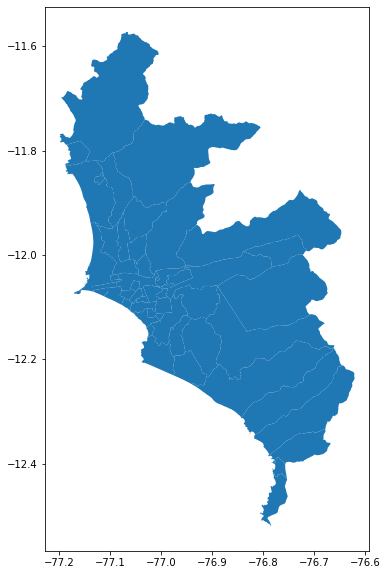

In [76]:
# limaMapa['departamen'].unique()
# limaMapa[limaMapa['departamen'] == 'CALLAO']['distrito'].unique()
limaMapa['LimaCallao'] = (limaMapa['provincia']=='LIMA') | (limaMapa['departamen']=='CALLAO')
limaMapa[limaMapa['LimaCallao']].plot(figsize=(10,10))

In [413]:
cond = limaMapa['LimaCallao']
limaMapa[cond]


,iddpto,departamen,idprov,provincia,iddist,distrito,capital,codccpp,area,fuente,geometry,LimaCallao
689,07,CALLAO,0701,CALLAO,070105,LA PUNTA,LA PUNTA,0001,1,INEI,"POLYGON ((-77.15884 -12.06645, -77.15874 -12.0...",True
690,07,CALLAO,0701,CALLAO,070104,LA PERLA,LA PERLA,0001,1,INEI,"POLYGON ((-77.10444 -12.07020, -77.10486 -12.0...",True
691,07,CALLAO,0701,CALLAO,070102,BELLAVISTA,BELLAVISTA,0001,1,INEI,"POLYGON ((-77.10086 -12.06307, -77.10317 -12.0...",True
692,07,CALLAO,0701,CALLAO,070103,CARMEN DE LA LEGUA REYNOSO,CARMEN DE LA LEGUA REYNOSO,0001,1,INEI,"POLYGON ((-77.08317 -12.03925, -77.08263 -12.0...",True
693,07,CALLAO,0701,CALLAO,070101,CALLAO,CALLAO,0001,1,INEI,"POLYGON ((-77.11219 -11.97352, -77.11203 -11.9...",True
694,07,CALLAO,0701,CALLAO,070106,VENTANILLA,VENTANILLA,0001,1,INEI,"POLYGON ((-77.13521 -11.81782, -77.13516 -11.8...",True
695,07,CALLAO,0701,CALLAO,070107,MI PERU,MI PERU,0001,1,INEI,"POLYGON ((-77.11509 -11.84172, -77.11450 -11.8...",True
1285,15,LIMA,1501,LIMA,150119,LURIN,LURIN,0001,1,INEI,"POLYGON ((-76.70549 -12.17672, -76.70429 -12.1...",True
1293,15,LIMA,1501,LIMA,150102,ANCON,ANCON,0001,1,INEI,"POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...",True
1308,15,LIMA,1501,LIMA,150131,SAN ISIDRO,SAN ISIDRO,0001,1,INEI,"POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...",True


<AxesSubplot:>

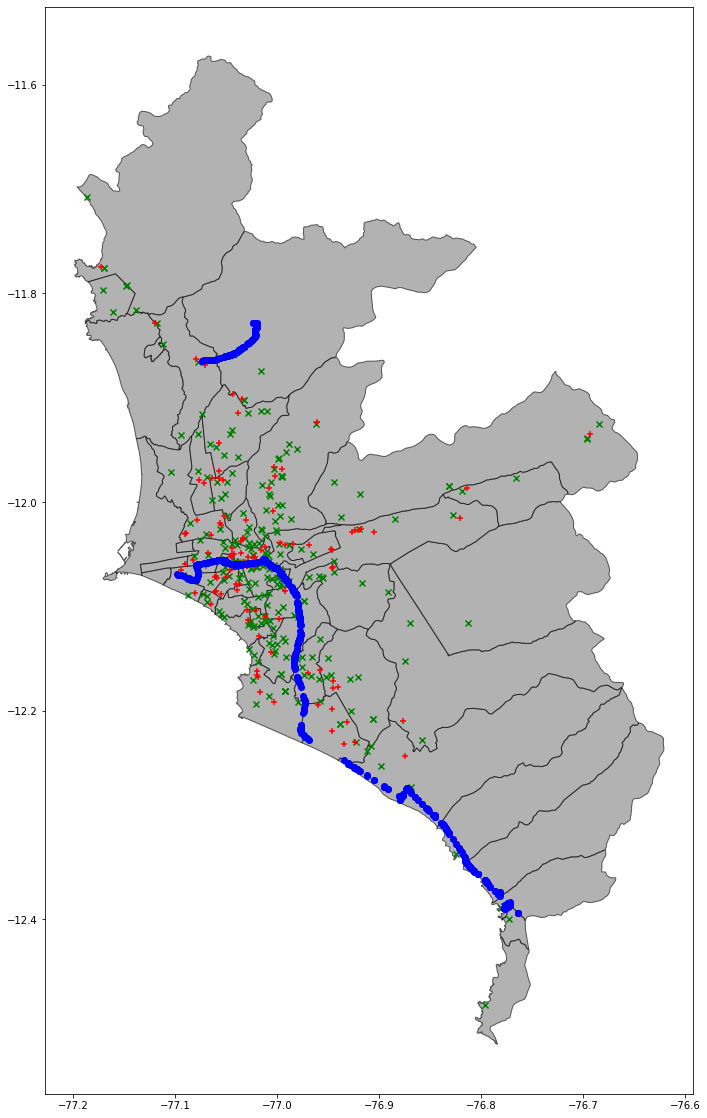

In [359]:
fig, ax = plt.subplots(figsize = (20,20))

# cond = (limaMapa['departamen'] == 'LIMA') & (limaMapa['departamen'] == 'CALLAO')
cond = limaMapa['LimaCallao']
limaMapa[cond].plot(ax=ax, alpha=0.6, color='gray', edgecolor='k')

cond = amenitiesLima['amenity'] == 'police'
police = amenitiesLima[cond]
police.plot(ax=ax, color='g', marker="x", label="Police")

cond = amenitiesLima['amenity'] == 'hospital'
hospital = amenitiesLima[cond]
hospital.plot(ax=ax, color='red', marker="+", label="Hospital")


# rutascosac.plot(ax=ax, color='b', marker='o', label='Rutas cosac')
# rutascorredores.plot(ax=ax, color='orange', marker='o', label='Rutas corredores')
# rutastransportepublico.plot(ax=ax, color='c', marker='o', label='Rutas transporte público')
cond = transporte_nodes['ruta'].isin(['8511', '1198'])
transporte_nodes[cond].plot(ax=ax, color='b', label='Transporte publico')
# rutastransportepublico[cond].plot(ax=ax, color='b', marker='-')